## Import the required libraries

In [2]:
import numpy as np  # linear algebra
import pandas as pd # data processing, reading CSV files etc.

### Assumptions
- This notebook assumes that the training data file is available within the same folder as the notebook (.ipynb).
- To avoid minor errors, the training data file is unaltered from the source that it is downloaded i.e. 'fraudTrain.csv'.

### Load the data
Downloaded from the kaggle dataset: [Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data) <br>
[Download Link](https://www.kaggle.com/datasets/kartik2112/fraud-detection/download?datasetVersionNumber=1)

In [11]:
# trng_df is the variable given to the training dataframe
trng_df = pd.read_csv('./fraudTrain.csv')

In [12]:
trng_df.head() # print the top 5 data items in the dataframe

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [19]:
trng_df.head().T.style.set_properties(**{'background-color': 'black',
                                            'color': 'orange',
                                            'border-color': 'white'})

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.970000,107.230000,220.110000,45.000000,41.960000
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest


## Get the details and information of the training dataset
1. Data types information
2. Check for missing values in the dataset
3. Evaluate the imbalance in the dataset

In [25]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [27]:
colors = ['orange', 'white']
labels = ['Genuine', 'Fraudulent']
values = trng_df['is_fraud'].value_counts()/trng_df['is_fraud'].shape[0]
# print(values)
fig = go.Figure(data=[go.Pie(labels = labels, values = values, hole=.2)])
fig.update_layout(title_text='Credit Card Fraud', title_font_color='black')

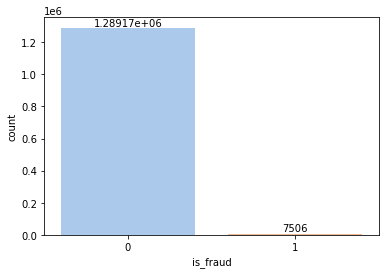

In [28]:
plt.figure()
ax = sns.countplot(x='is_fraud', data=trng_df, palette='pastel')
for i in ax.containers:
    ax.bar_label(i, )

## Data Cleaning

In [31]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [33]:
trng_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Drop columns that are not relevant to the model

In [34]:
drop_columns = ['Unnamed: 0', 'cc_num', 'merchant', 'trans_num', 'unix_time', 'first', 'last', 'street', 'zip']
trng_df.drop(columns=drop_columns, inplace=True)

In [35]:
print(trng_df.shape)

(1296675, 14)


In [37]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   city                   1296675 non-null  object 
 5   state                  1296675 non-null  object 
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   job                    1296675 non-null  object 
 10  dob                    1296675 non-null  object 
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

## handle date time

In [38]:
trng_df['trans_date_trans_time']=pd.to_datetime(trng_df['trans_date_trans_time'])
trng_df['trans_date']=trng_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
trng_df['trans_date']=pd.to_datetime(trng_df['trans_date'])
trng_df['dob']=pd.to_datetime(trng_df['dob'])

In [39]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

## feature engineering

In [41]:
#Calculate Age
trng_df["age"] = trng_df["trans_date"]-trng_df["dob"]
trng_df["age"] = trng_df["age"].astype('timedelta64[Y]')
trng_df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [42]:
trng_df['trans_month'] = pd.DatetimeIndex(trng_df['trans_date']).month

In [44]:
trng_df['trans_year'] = pd.DatetimeIndex(trng_df['trans_date']).year

In [45]:
trng_df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,trans_month,trans_year
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0,1,2019
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0,1,2019


In [46]:
#Calculate distance between merchant and home location
trng_df['latitudinal_distance'] = abs(round(trng_df['merch_lat']-trng_df['lat'],3))
trng_df['longitudinal_distance'] = abs(round(trng_df['merch_long']-trng_df['long'],3))

In [47]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
trng_df.drop(columns=drop_columns,inplace=True)

In [48]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   category               1296675 non-null  object 
 1   amt                    1296675 non-null  float64
 2   gender                 1296675 non-null  object 
 3   city_pop               1296675 non-null  int64  
 4   is_fraud               1296675 non-null  int64  
 5   age                    1296675 non-null  float64
 6   trans_month            1296675 non-null  int64  
 7   trans_year             1296675 non-null  int64  
 8   latitudinal_distance   1296675 non-null  float64
 9   longitudinal_distance  1296675 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 98.9+ MB


In [49]:
trng_df.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,F,3495,0,30.0,1,2019,0.068,0.870
1,grocery_pos,107.23,F,149,0,40.0,1,2019,0.271,0.024
2,entertainment,220.11,M,4154,0,56.0,1,2019,0.970,0.108
3,gas_transport,45.00,M,1939,0,51.0,1,2019,0.804,0.447
4,misc_pos,41.96,M,99,0,32.0,1,2019,0.254,0.830


In [50]:
g_trng_df = trng_df[trng_df.is_fraud == 0]
f_trng_df = trng_df[trng_df.is_fraud == 1]

In [52]:
g_trng_df.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,F,3495,0,30.0,1,2019,0.068,0.870
1,grocery_pos,107.23,F,149,0,40.0,1,2019,0.271,0.024
2,entertainment,220.11,M,4154,0,56.0,1,2019,0.970,0.108
3,gas_transport,45.00,M,1939,0,51.0,1,2019,0.804,0.447
4,misc_pos,41.96,M,99,0,32.0,1,2019,0.254,0.830


In [53]:
f_trng_df.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
2449,grocery_pos,281.06,M,885,1,30.0,1,2019,0.436,0.547
2472,gas_transport,11.52,F,1595797,1,58.0,1,2019,0.379,0.684
2523,grocery_pos,276.31,F,1595797,1,58.0,1,2019,0.167,0.377
2546,gas_transport,7.03,M,885,1,30.0,1,2019,0.085,0.364
2553,grocery_pos,275.73,F,1595797,1,58.0,1,2019,0.346,0.224


In [54]:
g_trng_df = g_trng_df.sample(7506)

In [55]:
g_trng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 1065308 to 473346
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               7506 non-null   object 
 1   amt                    7506 non-null   float64
 2   gender                 7506 non-null   object 
 3   city_pop               7506 non-null   int64  
 4   is_fraud               7506 non-null   int64  
 5   age                    7506 non-null   float64
 6   trans_month            7506 non-null   int64  
 7   trans_year             7506 non-null   int64  
 8   latitudinal_distance   7506 non-null   float64
 9   longitudinal_distance  7506 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 645.0+ KB


In [56]:
f_trng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               7506 non-null   object 
 1   amt                    7506 non-null   float64
 2   gender                 7506 non-null   object 
 3   city_pop               7506 non-null   int64  
 4   is_fraud               7506 non-null   int64  
 5   age                    7506 non-null   float64
 6   trans_month            7506 non-null   int64  
 7   trans_year             7506 non-null   int64  
 8   latitudinal_distance   7506 non-null   float64
 9   longitudinal_distance  7506 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 645.0+ KB


In [57]:
balanced_trng_df = pd.concat([g_trng_df, f_trng_df], axis=0)

In [58]:
balanced_trng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 1065308 to 1295733
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               15012 non-null  object 
 1   amt                    15012 non-null  float64
 2   gender                 15012 non-null  object 
 3   city_pop               15012 non-null  int64  
 4   is_fraud               15012 non-null  int64  
 5   age                    15012 non-null  float64
 6   trans_month            15012 non-null  int64  
 7   trans_year             15012 non-null  int64  
 8   latitudinal_distance   15012 non-null  float64
 9   longitudinal_distance  15012 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [60]:
balanced_trng_df.gender = balanced_trng_df.gender.apply(lambda x: 1 if x=="M" else 0)

In [61]:
balanced_trng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 1065308 to 1295733
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               15012 non-null  object 
 1   amt                    15012 non-null  float64
 2   gender                 15012 non-null  int64  
 3   city_pop               15012 non-null  int64  
 4   is_fraud               15012 non-null  int64  
 5   age                    15012 non-null  float64
 6   trans_month            15012 non-null  int64  
 7   trans_year             15012 non-null  int64  
 8   latitudinal_distance   15012 non-null  float64
 9   longitudinal_distance  15012 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [62]:
balanced_trng_df.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
1065308,personal_care,80.60,0,4056,0,29.0,3,2020,0.914,0.793
824708,health_fitness,22.87,1,653,0,53.0,12,2019,0.286,0.985
1044395,grocery_pos,61.93,1,9815,0,44.0,3,2020,0.339,0.467
1199688,kids_pets,46.27,0,391389,0,26.0,5,2020,0.387,0.207
333814,gas_transport,71.90,1,198,0,40.0,6,2019,0.027,0.978


In [63]:
X_train = balanced_trng_df.drop('is_fraud', axis=1)
y_train = balanced_trng_df['is_fraud']

In [66]:
y_train.head()

1065308    0
824708     0
1044395    0
1199688    0
333814     0
Name: is_fraud, dtype: int64

In [69]:
pip install imblearn

     |████████████████████████████████| 235 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 3.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [70]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(random_state=42)

In [73]:
X_train, y_train = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'personal_care'

In [74]:
balanced_trng_df['category'].unique()

array(['personal_care', 'health_fitness', 'grocery_pos', 'kids_pets',
       'gas_transport', 'home', 'misc_pos', 'grocery_net', 'shopping_net',
       'shopping_pos', 'misc_net', 'travel', 'food_dining',
       'entertainment'], dtype=object)

In [77]:
balanced_trng_df['category'].unique()

array(['personal_care', 'health_fitness', 'grocery_pos', 'kids_pets',
       'gas_transport', 'home', 'misc_pos', 'grocery_net', 'shopping_net',
       'shopping_pos', 'misc_net', 'travel', 'food_dining',
       'entertainment'], dtype=object)

In [80]:
balanced_trng_df = pd.get_dummies(balanced_trng_df, columns=['category'], prefix='category')

In [81]:
balanced_trng_df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1065308,80.60,0,4056,0,29.0,3,2020,0.914,0.793,0,...,0,0,0,0,0,0,1,0,0,0
824708,22.87,1,653,0,53.0,12,2019,0.286,0.985,0,...,0,1,0,0,0,0,0,0,0,0
1044395,61.93,1,9815,0,44.0,3,2020,0.339,0.467,0,...,1,0,0,0,0,0,0,0,0,0
1199688,46.27,0,391389,0,26.0,5,2020,0.387,0.207,0,...,0,0,0,1,0,0,0,0,0,0
333814,71.90,1,198,0,40.0,6,2019,0.027,0.978,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X_train = balanced_trng_df.drop('is_fraud', axis=1)
y_train = balanced_trng_df['is_fraud']

In [83]:
y_train.head()

1065308    0
824708     0
1044395    0
1199688    0
333814     0
Name: is_fraud, dtype: int64

In [84]:
X_train.head()

,amt,gender,city_pop,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1065308,80.60,0,4056,29.0,3,2020,0.914,0.793,0,0,...,0,0,0,0,0,0,1,0,0,0
824708,22.87,1,653,53.0,12,2019,0.286,0.985,0,0,...,0,1,0,0,0,0,0,0,0,0
1044395,61.93,1,9815,44.0,3,2020,0.339,0.467,0,0,...,1,0,0,0,0,0,0,0,0,0
1199688,46.27,0,391389,26.0,5,2020,0.387,0.207,0,0,...,0,0,0,1,0,0,0,0,0,0
333814,71.90,1,198,40.0,6,2019,0.027,0.978,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE(random_state=23)

In [93]:
# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [96]:
# Step 2: Transform both the training and testing data
X_train = scaler.transform(X_train)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)